In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../../data/final.csv")

In [4]:
df.drop([df.columns[0],'index'],inplace=True,axis=1)
df

,open,high,low,close,volume,macd,signal,hist,macd.1,signal.1,macd_signal,macd_position
0,15.07,15.12,14.63,14.75,8407500,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
1,14.45,14.51,14.10,14.27,8126000,-0.038291,-0.007658,-0.030632,-0.038291,-0.007658,-1,0
2,13.57,13.60,13.21,13.57,6071400,-0.123694,-0.030865,-0.092829,-0.123694,-0.030865,0,0
3,13.60,13.76,13.00,13.02,7186400,-0.233071,-0.071307,-0.161765,-0.233071,-0.071307,0,0
4,13.28,13.62,13.18,13.41,7390500,-0.284998,-0.114045,-0.170953,-0.284998,-0.114045,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
514597,76.84,78.27,76.69,77.82,2982259,1.533067,1.597054,-0.063988,1.533067,1.597054,-1,0
514598,77.53,78.12,76.73,76.78,2595187,1.360930,1.549829,-0.188899,1.360930,1.549829,0,0
514599,76.64,76.92,73.18,73.83,2962031,0.975229,1.434909,-0.459681,0.975229,1.434909,0,0
514600,72.74,74.56,72.13,73.27,4924323,0.617255,1.271378,-0.654124,0.617255,1.271378,0,0


In [5]:
df.shape


(514602, 12)

In [6]:
df.columns[1:6]

Index(['high', 'low', 'close', 'volume', 'macd'], dtype='object')

In [7]:
df.close.describe()

count    514602.000000
mean         68.963956
std          35.340579
min           1.660000
25%          42.040000
50%          62.780000
75%          88.720000
max         175.070000
Name: close, dtype: float64

In [8]:
for i in df.columns[1:6]:
    df[i] = (df[i] - df[i].mean()) / df[i].std()


In [9]:
from sklearn.decomposition import PCA
df2 = df.sample(n=12_000,random_state=42)
X = df2.drop(['close'],axis=1)
y = df2['close']
pca = PCA(0.90)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.98342168]


In [10]:
X

,open,high,low,volume,macd,signal,hist,macd.1,signal.1,macd_signal,macd_position
2940,67.170,-0.060455,-0.050499,-0.578480,0.532247,1.231463,0.148366,1.379829,1.231463,0,1
139623,119.300,1.407031,1.433941,0.443152,0.747141,1.870947,0.065654,1.936602,1.870947,0,1
307219,54.790,-0.409991,-0.406696,1.040447,0.168430,0.647197,-0.209985,0.437212,0.647197,0,0
286844,28.680,-1.142331,-1.146776,-0.863217,-0.057094,-0.202272,0.055169,-0.147103,-0.202272,0,1
80244,30.980,-1.082110,-1.103678,0.429231,-0.435407,-0.656212,-0.471067,-1.127279,-0.656212,0,0
...,...,...,...,...,...,...,...,...,...,...,...
428354,68.120,-0.034626,-0.016820,0.083447,-0.639607,-1.430595,-0.225748,-1.656343,-1.430595,0,0
290961,25.570,-1.227102,-1.223837,-0.522078,0.202942,0.363737,0.162890,0.526627,0.363737,0,1
107697,23.230,-1.298850,-1.293193,0.831078,0.135188,0.379989,-0.028907,0.351083,0.379989,0,0
437361,36.120,-0.904114,-0.933571,2.116976,0.065360,0.101053,0.069113,0.170165,0.101053,0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Define regressors and their hyperparameters
regressors = {'Linear Regression': LinearRegression(),
              'Decision Tree': DecisionTreeRegressor(random_state=42),
              'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
              'Support Vector Machine': SVR(kernel='linear'),
              'XGBoost': XGBRegressor(n_estimators=100, random_state=42)}

params = {'Decision Tree': {'max_depth': 3, 'min_samples_split': 2},
          'Random Forest': {'max_depth': 6, 'min_samples_split': 2},
          'Support Vector Machine': {'C': 0.1},
          'XGBoost': {'max_depth': 3, 'learning_rate': 0.1}}

# Train and evaluate regressors
results = []
for name, regressor in regressors.items():
    model = regressor.set_params(**params.get(name, {}))
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'Train Score': train_score, 'Test Score': test_score, 'MSE': mse, 'R2 Score': r2})

# Save results to a dataframe
df_results = pd.DataFrame(results)
df_results

,Model,Train Score,Test Score,MSE,R2 Score
0,Linear Regression,0.999870,0.999878,0.000118,0.999878
1,Decision Tree,0.976929,0.975750,0.023575,0.975750
2,Random Forest,0.999785,0.999730,0.000262,0.999730
3,Support Vector Machine,0.999312,0.999324,0.000657,0.999324
4,XGBoost,0.999785,0.999682,0.000309,0.999682


<Axes: xlabel='Test Score', ylabel='Model'>

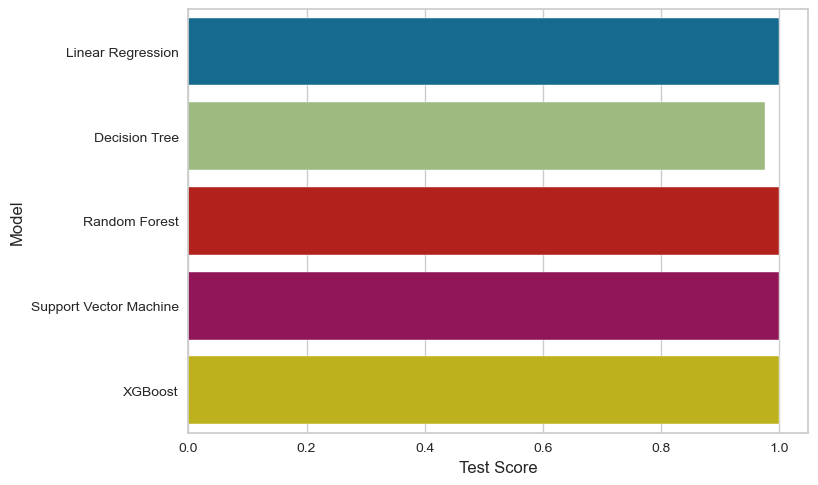

In [13]:
sns.barplot(y=df_results['Model'],x=df_results['Test Score'])

In [14]:
X = df2.drop(['macd_position'],axis=1)
y = df2['macd_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Classifier": SVC(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

dfs = []
cnfm  = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    cm = classification_report(y_test, y_pred,output_dict=True)
    dfs.append(report)
    cnfm.append(cm)
    


False-Positives: When the actual class is 0 (false) but the algorithm predicts 1 (true).
False-Negatives: When the actual class is 1 (true) but the algorithm predicts 0 (false).

Precision
-----------
• It’s a ratio of True Positives to all the positives
predicted by the model.
 the more False positives the model
predicts, the lower the precision.

recall
-----------
It’s a ratio of True Positives to all the positives in

the more False Negatives the model
predicts, the lower the recall.

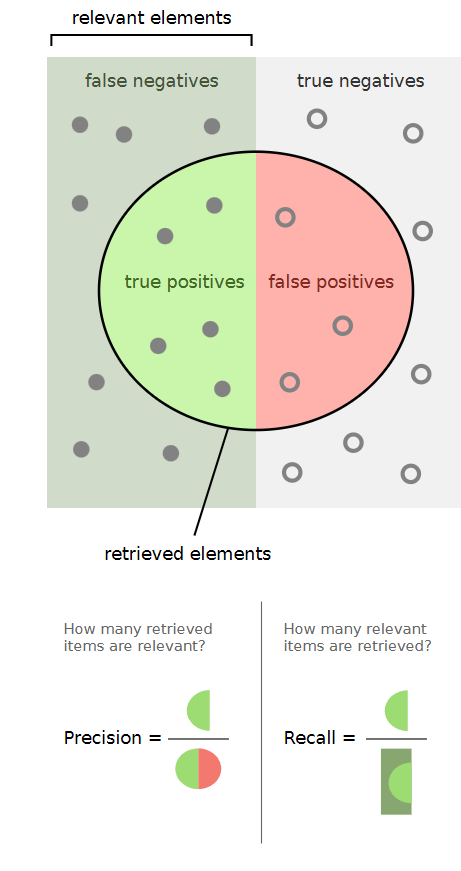

<Axes: >

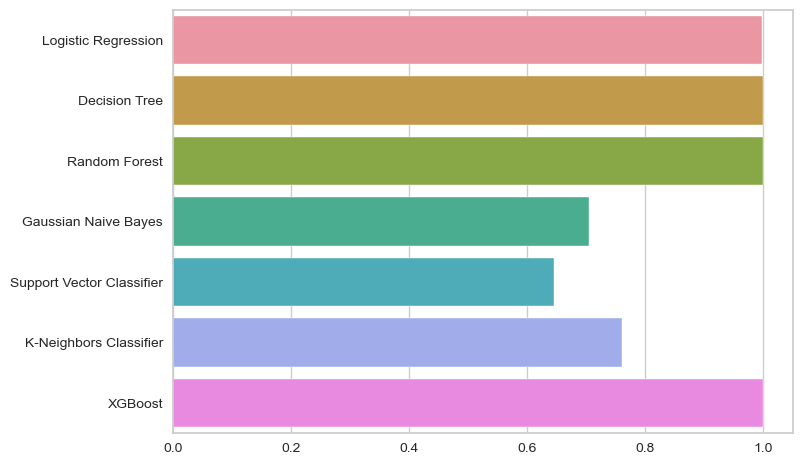

In [16]:
cols = classifiers.keys()
cols = list(cols)

y  = [i['accuracy'] for i in cnfm]

sns.barplot(y=cols, x=y)


In [17]:
for i in range (len(dfs) ):
   print(cols[i] , '\n', dfs[i] , '\n','*'*60)


Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1802
           1       1.00      1.00      1.00      1798

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600
 
 ************************************************************
Decision Tree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1802
           1       1.00      1.00      1.00      1798

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600
 
 ************************************************************
Random Forest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1802
           1       1.00      1.00      1.00      1798

  

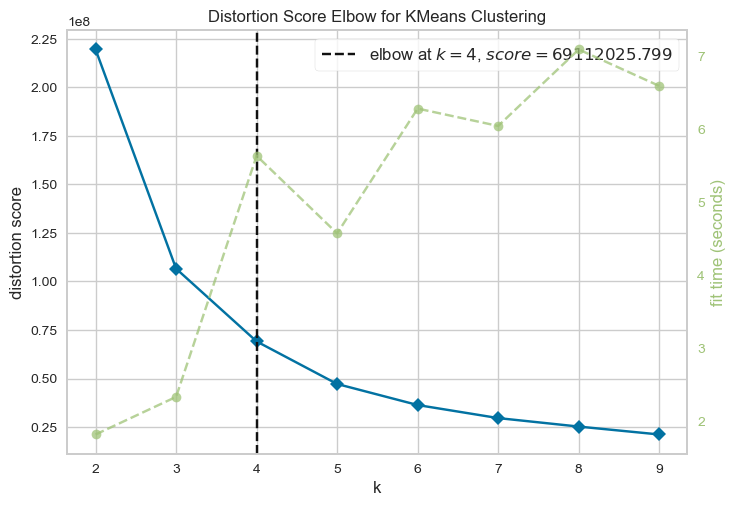

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [23]:
model = KMeans(n_clusters=6)
y_labels = model.fit_predict(df2)

centers = model.cluster_centers_
shilhoute_score = silhouette_score(df2,model.labels_)

In [24]:
shilhoute_score

0.4833314358406218

Kernel: The kernel is a function that maps the input data to a higher-dimensional space. The choice of kernel can have a significant impact on the performance of the model. Some common kernels include the linear kernel, the polynomial kernel, and the radial basis function (RBF) kernel.

Gamma: The gamma parameter controls the spread of the RBF kernel. A higher value of gamma will result in a narrower kernel, while a lower value of gamma will result in a wider kernel.

C: The C parameter controls the trade-off between the model's bias and variance. A higher value of C will result in a model with lower bias, but higher variance. A lower value of C will result in a model with lower variance, but higher bias.

Epsilon: The epsilon parameter controls the amount of regularization applied to the model. A higher value of epsilon will result in a more regularized model, while a lower value of epsilon will result in a less regularized model.

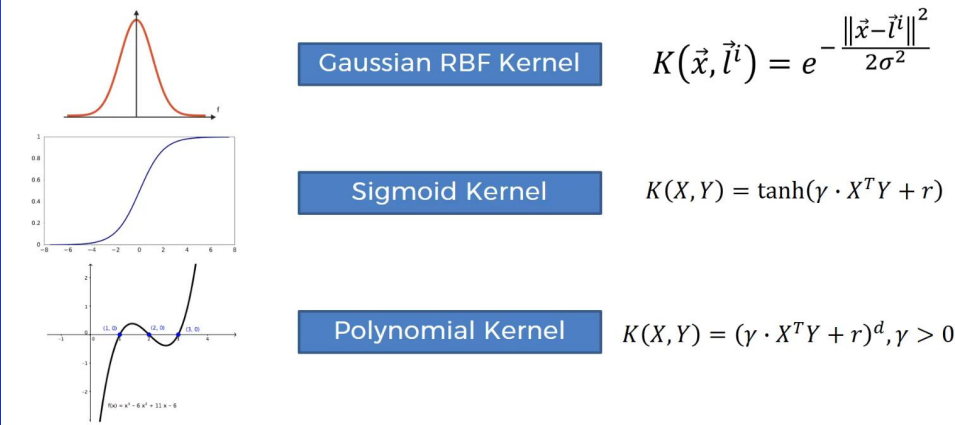

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR

kf = KFold(n_splits=5)

svr = SVR()

# Create a dictionary of hyperparameters to search over.
param_grid = {"kernel": ["linear", "poly", "rbf"],
                "gamma": [0.001, 0.01, 0.1],
                "C": [1, 10, 100],
                "epsilon": [0.01, 0.1, 1]}

# Perform grid search over the hyperparameters.
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=kf)

# Fit the grid search object to the data.
grid_search.fit(X_train, y_train)

# Select the best hyperparameters.
best_params = grid_search.best_params_

# Train the SVR model using the best hyperparameters.
svr.set_params(**best_params)
svr.fit(X_train, y_train)

# Evaluate the SVR model on the test set.
y_pred = svr.predict(X_test)
score = accuracy_score(y_test, y_pred)

# Print the results.
print("The accuracy of the SVR model is:", score)